In [1]:
from utility_dfcutter import *
from utility_dfplotter import ASingleKinematicPlot
%matplotlib inline

In [2]:
class DFPlotter:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        Data = DFCutter(self.selection, self.nbjet, 'data2016', self.njet).getDataFrame(variation)
        MCzz = DFCutter(self.selection, self.nbjet, 'mcdiboson',self.njet).getDataFrame(variation)
        MCz  = DFCutter(self.selection, self.nbjet, 'mcz',      self.njet).getDataFrame(variation)
        MCw  = DFCutter(self.selection, self.nbjet, 'mcw',      self.njet).getDataFrame(variation)
        MCt  = DFCutter(self.selection, self.nbjet, 'mct',      self.njet).getDataFrame(variation)
        MCtt = DFCutter(self.selection, self.nbjet, 'mctt',     self.njet).getDataFrame(variation)
        dfList = [MCzz,MCz,MCw,MCt,MCtt,Data]
        return dfList
    
    def _setConfiguration(self):
            self.labelList = ['Diboson','Z+Jets','W+Jets','t','tt','data']
            self.colorList = ['#a32020','#e0301e','#eb8c00','springgreen','deepskyblue','k']
            self.adjust = [1,1,1,1,1,1,1,1,1]

1.1125653400792177


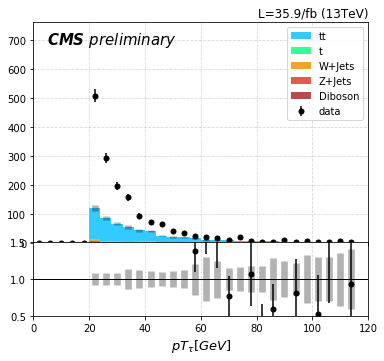

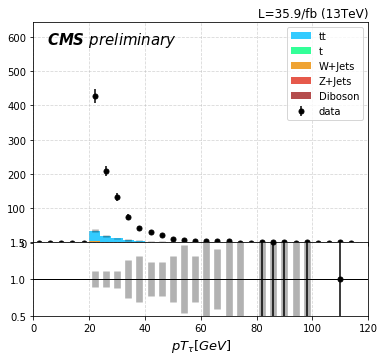

In [3]:
slt,nbjets = "etau_fakes",">=1"
v,a,b,step,xl = "lepton2_pt", 0,120,4,r"$pT_\tau [GeV]$"

plotter = DFPlotter(slt,nbjets)
sk = ASingleKinematicPlot(v,a,b,step, plotter.getDataFrameList())
sk.settingPlot(xl,plotter.labelList,plotter.colorList)
sk.makePlot()

nmc = sum([w.sum() for w in sk.weight_list])
ndt = sk.Dataw.sum()
nfakeos = ndt-nmc/0.92

slt += "_ss"
plotter = DFPlotter(slt,nbjets)
sk = ASingleKinematicPlot(v,a,b,step, plotter.getDataFrameList())
sk.settingPlot(xl,plotter.labelList,plotter.colorList)
sk.makePlot()

nmc = sum([w.sum() for w in sk.weight_list])
ndt = sk.Dataw.sum()
nfakess = ndt-nmc/0.92

print(nfakeos/nfakess)